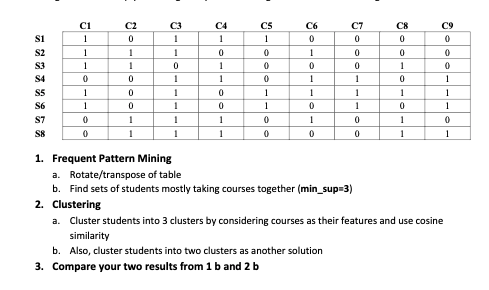

# 1. Frequent Pattern Mining
## a. Rotate/transpose of table
## b. Find sets of students mostly taking courses together (min_sup=3)

## Apriori

## Importing the libraries

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=24175de6f72366feed4250b7702072f46716ab8a3c56c9ce1b1e24aeb66e0dcc
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [6]:
dataset = pd.read_csv('dataset.csv', header = None)
dataset = dataset.transpose()
dataset = dataset.iloc[:,1:]
transactions = []
for i in range(len(dataset)):
  transactions.append([str(dataset.values[i,j]) for j in range(len(dataset.columns))])

## Training the Apriori model on the dataset

In [14]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [15]:
results = list(rules)

In [62]:
len(results)

28

### Putting the results well organised into a Pandas DataFrame

In [17]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [18]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,S1,S2,0.1,1.0,10.0
1,S1,S3,0.1,1.0,10.0
2,S1,S4,0.1,1.0,10.0
3,S1,S5,0.1,1.0,10.0
4,S1,S6,0.1,1.0,10.0
5,S1,S7,0.1,1.0,10.0
6,S1,S8,0.1,1.0,10.0
7,S2,S3,0.1,1.0,10.0
8,S2,S4,0.1,1.0,10.0
9,S2,S5,0.1,1.0,10.0


### Displaying the results sorted by descending lifts

In [82]:
print("Answer:")
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

Answer:


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,S1,S2,0.1,1.0,10.0
1,S1,S3,0.1,1.0,10.0
2,S1,S4,0.1,1.0,10.0
3,S1,S5,0.1,1.0,10.0
4,S1,S6,0.1,1.0,10.0
5,S1,S7,0.1,1.0,10.0
6,S1,S8,0.1,1.0,10.0
7,S2,S3,0.1,1.0,10.0
8,S2,S4,0.1,1.0,10.0
9,S2,S5,0.1,1.0,10.0


# 2. Clustering
## a. Cluster students into 3 clusters by considering courses as their features and use cosine similarity

## K-Means Clustering

## Importing the libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [70]:
dataset = pd.read_csv('dataset.csv',header=0)
dataset = dataset.iloc[1:,1:]
X = dataset.values
dataset

,C1,C2,C3,C4,C5,C6,C7,C8,C9
1,1,1,1,0,0,1,0,0,0
2,1,1,0,1,0,0,0,1,0
3,0,0,1,1,0,1,1,0,1
4,1,0,1,0,1,1,1,1,1
5,1,0,1,0,1,0,1,0,1
6,0,1,1,1,0,1,0,1,0
7,0,1,1,1,0,0,0,1,1


In [71]:
X

array([[1, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 1]])

## Training the K-Means model on the dataset

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [73]:
y_kmeans

array([1, 2, 0, 0, 0, 2, 2], dtype=int32)

In [74]:
dataset["Cluster"] = y_kmeans
cluster_data = dataset.groupby(by = "Cluster").mean()
cluster_data["Count"] = [(dataset.Cluster[dataset.Cluster == 0]).count(),(dataset.Cluster[dataset.Cluster == 1]).count(),(dataset.Cluster[dataset.Cluster == 2]).count()]

In [75]:
cluster_data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Count
Cluster,,,,,,,,,,
0,0.666667,0.0,1.000000,0.333333,0.666667,0.666667,1.0,0.333333,1.000000,3
1,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1
2,0.333333,1.0,0.666667,1.000000,0.000000,0.333333,0.0,1.000000,0.333333,3


# b. Also, cluster students into two clusters as another solution

## Training the K-Means model on the dataset

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [77]:
y_kmeans

array([1, 1, 0, 0, 0, 1, 1], dtype=int32)

In [79]:
dataset["Cluster"] = y_kmeans
cluster_data = dataset.groupby(by = "Cluster").mean()
cluster_data["Count"] = [(dataset.Cluster[dataset.Cluster == 0]).count(),(dataset.Cluster[dataset.Cluster == 1]).count()]

In [80]:
cluster_data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Count
Cluster,,,,,,,,,,
0,0.666667,0.0,1.00,0.333333,0.666667,0.666667,1.0,0.333333,1.00,3
1,0.500000,1.0,0.75,0.750000,0.000000,0.500000,0.0,0.750000,0.25,4


# 3. Compare your two resilts from 1 b and 2 b

### 1 b:
*   Student 1 is most simmer to Student b who is in top similarity

### 2 b:
*   Students clustered in two groups 1st cluster contain three students *   2nd contains four students